In [29]:
%load_ext autoreload
%autoreload 2


import anchor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-02-23 09:04:32	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-23 09:04:32	Parsing datapackage to create a Study object
2016-02-23 09:05:18	Initializing Study
2016-02-23 09:05:18	Initializing Predictor configuration manager for Study
2016-02-23 09:05:18	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-23 09:05:18	Added ExtraTreesClassifier to default predictors
2016-02-23 09:05:18	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-23 09:05:18	Added ExtraTreesRegressor to default predictors
2016-02-23 09:05:18	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-23 09:05:18	Added GradientBoostingClassifier to default predic

In [30]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/isoform_domain_effects'
! mkdir $folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/isoform_domain_effects': File exists


In [31]:
splicing_feature_data = pd.read_csv(
    '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
    'singlecell_pnm_figure4_voyages_changing_events/splicing_feature.csv.gz', compression='gzip', index_col=0)
splicing_feature_data.head()

,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,isoform2_pfam_name,isoform_domain_effects,custom_1,custom_2,custom_3,custom_4,Changing Events,Strict Changing Events,custom_5,custom_6
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,NaN,No annotated reading frame --> Protein +/- domain,False,False,False,False,NaN,NaN,False,False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,NaN,NaN,False,False,False,False,NaN,NaN,False,False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,NaN,NaN,False,False,False,False,NaN,NaN,False,False
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,Aminotran_1_2[1],No annotated reading frame --> Protein +/- domain,True,True,True,True,Background,Background,True,True
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,NaN,NaN,True,True,True,True,NaN,NaN,True,True


In [32]:
splicing_feature_data.loc[splicing_feature_data.gene_name.isin(['SNAP25', 'SMARCE1', 'PKM']), 
                          ['gene_name', 'isoform_domain_effects']]

,gene_name,isoform_domain_effects
event_id,,
exon:chr15:72499069-72499139:-@exon:chr15:72494795-72494961:-@exon:chr15:72492849-72492996:-,PKM,NaN
exon:chr15:72499069-72499139:-@exon:chr15:72495363-72495529:-@exon:chr15:72492815-72492996:-,PKM,NaN
exon:chr15:72523457-72523531:-@exon:chr15:72513509-72513625:-@exon:chr15:72511285-72511451:-,PKM,NaN
exon:chr17:38798707-38798811:-@exon:chr17:38796233-38796330:-@exon:chr17:38793744-38793824:-,SMARCE1,Protein +/- domain --> No annotated reading frame
exon:chr17:38801828-38801871:-@exon:chr17:38798707-38798811:-@exon:chr17:38793744-38793824:-,SMARCE1,Same status
exon:chr17:38802048-38802099:-@exon:chr17:38798707-38798811:-@exon:chr17:38793744-38793824:-,SMARCE1,Same status
exon:chr17:38804025-38804065:-@exon:chr17:38798707-38798811:-@exon:chr17:38793744-38793824:-,SMARCE1,NaN
exon:chr17:38802048-38802099:-@exon:chr17:38801828-38801871:-@exon:chr17:38793744-38793824:-,SMARCE1,No annotated reading frame --> Protein +/- domain
exon:chr17:38802048-38802099:-@exon:chr17:38801828-38801871:-@exon:chr17:38796826-38798811:-,SMARCE1,No annotated reading frame --> Protein +/- domain


In [33]:
from anchor import MODALITY_ORDER

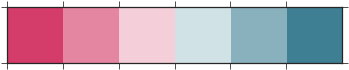

In [72]:
col = 'isoform_domain_effects'

order = MODALITY_ORDER[:3]
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

hue_order = isoform_domain_effects_order
palette = sns.diverging_palette(0, 220, n=6)
sns.palplot(palette)

In [73]:
domain_total_sizes = splicing_feature_data.groupby(col).size().reset_index()
domain_total_sizes = domain_total_sizes.rename(columns={0: 'count'})
domain_total_sizes.head()

,isoform_domain_effects,count
0,Domain --> No domain,121
1,Domain switch,37
2,No annotated reading frame --> Protein +/- domain,11331
3,No domain --> Domain,633
4,Protein +/- domain --> No annotated reading frame,3795


In [74]:
domain_total_sizes['percentage'] = 100 * domain_total_sizes['count']/domain_total_sizes['count'].sum()
domain_total_sizes.head()

,isoform_domain_effects,count,percentage
0,Domain --> No domain,121,0.644749
1,Domain switch,37,0.197155
2,No annotated reading frame --> Protein +/- domain,11331,60.377258
3,No domain --> Domain,633,3.372942
4,Protein +/- domain --> No annotated reading frame,3795,20.221666


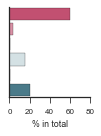

In [75]:
fig, ax = plt.subplots(figsize=(1.5, 2))
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order)
ax.set(xlabel='% in total', yticks=[], ylabel='')
ax.locator_params(nbins=4, axis='x')
sns.despine()
fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution.pdf'.format(folder))

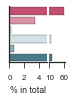

In [76]:
fig, axes = plt.subplots(figsize=(1, 1), ncols=2, gridspec_kw=dict(wspace=0.1, width_ratios=[0.7, 0.3]))
ax = axes[0]
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order, ax=ax)
ax.set(yticks=[], ylabel='', xlim=(0, 5), xlabel='% in total')
ax.locator_params(nbins=4, axis='x')
sns.despine(ax=ax)

ax = axes[1]
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order, ax=ax)
ax.set(xlabel='', yticks=[], ylabel='', xlim=(10, 65), xticks=[10, 60])
# ax.locator_params(nbins=4, axis='x')
sns.despine(ax=ax, left=True)

# fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution_split_axes.pdf'.format(folder))

In [77]:
modalities_domains = study.supplemental.modalities_tidy.join(splicing_feature_data[col], on='event_id')
modalities_domains.head()

,phenotype,event_id,modality,isoform_domain_effects
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,No annotated reading frame --> Protein +/- domain
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,NaN
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,Protein +/- domain --> No annotated reading frame
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,Same status
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,NaN


In [78]:
sizes = modalities_domains.groupby(['phenotype', 'modality', col]).size()
sizes = sizes.reset_index()
sizes = sizes.rename(columns={0: 'count'})
sizes['percentage'] = 100 *sizes.groupby(['phenotype', 'modality'])['count'].apply(lambda x: x/x.sum())
sizes.head()

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,bimodal,Domain switch,1,0.689655
1,MN,bimodal,No annotated reading frame --> Protein +/- domain,63,43.448276
2,MN,bimodal,No domain --> Domain,19,13.103448
3,MN,bimodal,Protein +/- domain --> No annotated reading frame,19,13.103448
4,MN,bimodal,Same status,43,29.655172


In [79]:
sizes.loc[sizes['isoform_domain_effects'] == 'Domain switch']

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,bimodal,Domain switch,1,0.689655
11,MN,included,Domain switch,3,0.399467
28,NPC,included,Domain switch,8,0.502513
37,iPSC,bimodal,Domain switch,2,0.346620
43,iPSC,excluded,Domain switch,1,0.178253
49,iPSC,included,Domain switch,10,0.399521


In [80]:
sizes.loc[sizes['modality'] == 'bimodal']

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,bimodal,Domain switch,1,0.689655
1,MN,bimodal,No annotated reading frame --> Protein +/- domain,63,43.448276
2,MN,bimodal,No domain --> Domain,19,13.103448
3,MN,bimodal,Protein +/- domain --> No annotated reading frame,19,13.103448
4,MN,bimodal,Same status,43,29.655172
18,NPC,bimodal,Domain --> No domain,2,0.682594
19,NPC,bimodal,No annotated reading frame --> Protein +/- domain,134,45.733788
20,NPC,bimodal,No domain --> Domain,26,8.873720
21,NPC,bimodal,Protein +/- domain --> No annotated reading frame,51,17.406143
22,NPC,bimodal,Same status,80,27.303754


In [81]:
sns.set(context='paper', style='ticks')

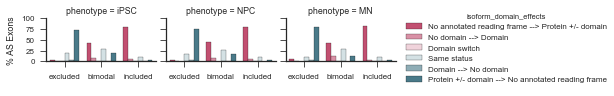

In [82]:

g = sns.factorplot(hue=col, col='phenotype', x='modality', y='percentage', kind='bar',  data=sizes,
#                        hue_order=hue_order, palette=palette, 
                   hue_order=hue_order, aspect=1.3,
                   palette=palette,
                   order=order, size=1.5,
                   col_order=study.phenotype_order)
g.set(yticks=(0, 25, 50, 75, 100))
g.set_ylabels('% AS Exons')
g.set_xlabels('')
g.savefig('{}/modality_features_{}_barplot.pdf'.format(folder, col))

In [83]:
modality_order = MODALITY_ORDER[:3]

In [84]:
sizes.loc[sizes.percentage > 60]

,phenotype,modality,isoform_domain_effects,count,percentage
8,MN,excluded,Protein +/- domain --> No annotated reading frame,133,79.640719
12,MN,included,No annotated reading frame --> Protein +/- domain,624,83.089214
26,NPC,excluded,Protein +/- domain --> No annotated reading frame,283,75.466667
29,NPC,included,No annotated reading frame --> Protein +/- domain,1284,80.653266
46,iPSC,excluded,Protein +/- domain --> No annotated reading frame,413,73.618538
50,iPSC,included,No annotated reading frame --> Protein +/- domain,2001,79.944067


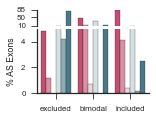

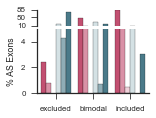

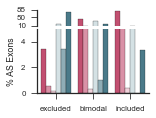

In [85]:

for phenotype, df in sizes.groupby('phenotype'):
    
    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 1.5), 
                             gridspec_kw=dict(hspace=0.075, height_ratios=[0.2, 0.8]))

    ax = axes[0]
    sns.barplot(x='modality', hue=col, y='percentage', data=df, ax=ax,
                hue_order=hue_order, palette=palette, x_order=modality_order)
    ax.legend_.set_visible(False)
    ax.locator_params('y', nbins=4)
    sns.despine(ax=ax, bottom=True)
    ax.tick_params(axis='x', bottom='off')
    ax.set(xticks=[], xlabel='', ylim=(10, 85), ylabel='', yticks=[10, 50, 85])

    ax = axes[1]
    sns.barplot(x='modality', hue=col, y='percentage', data=df, ax=ax,
               hue_order=hue_order, palette=palette, x_order=modality_order)
    ax.set(ylim=(0, 5), ylabel='% AS Exons', 
           xlabel='')
    ax.legend_.set_visible(False)
    ax.locator_params('y', nbins=4)
    sns.despine(ax=ax)


    fig.savefig('{}/modality_features_{}_{}_barplot.pdf'.format(folder, col, phenotype))

### Statistics of enrichment (Hypergeometric)

In [86]:
import six

In [87]:
from scipy.stats import hypergeom

lines = []

for phenotype, phenotype_df in modalities_domains.groupby(['phenotype']):
#     six.print_(phenotype)
    M = phenotype_df.shape[0]
    phenotype_domain_grouped_sizes = phenotype_df.groupby(col).size()
    for modality, modality_df in phenotype_df.groupby('modality'):
        n = modality_df.shape[0]
#         six.print_('\t', modality)
        
        grouped = modality_df.groupby(col)
        for domain, domain_df in modality_df.groupby(col):
#             six.print_('\t\t\t', domain)
            N = phenotype_domain_grouped_sizes[domain]
            x = domain_df.shape[0]

            result = hypergeom.sf(x, M, n, N)
#             six.print_('\t\t\t', result)
            lines.append([phenotype, modality, domain, result])
domain_p_value_df = pd.DataFrame(lines, columns=['phenotype', 'modality', col, '$p$-value'])
domain_p_value_df

,phenotype,modality,isoform_domain_effects,$p$-value
0,MN,bimodal,Domain switch,1.032545e-01
1,MN,bimodal,No annotated reading frame --> Protein +/- domain,9.999996e-01
2,MN,bimodal,No domain --> Domain,1.509924e-05
3,MN,bimodal,Protein +/- domain --> No annotated reading frame,8.874758e-01
4,MN,bimodal,Same status,2.040887e-08
5,MN,excluded,Domain --> No domain,5.410235e-06
6,MN,excluded,No annotated reading frame --> Protein +/- domain,1.000000e+00
7,MN,excluded,No domain --> Domain,9.997441e-01
8,MN,excluded,Protein +/- domain --> No annotated reading frame,2.562854e-60
9,MN,excluded,Same status,9.962579e-01


In [88]:
domain_p_value_df['$q$-value'] = domain_p_value_df.shape[0] * domain_p_value_df['$p$-value']
domain_p_value_df.head()

,phenotype,modality,isoform_domain_effects,$p$-value,$q$-value
0,MN,bimodal,Domain switch,1.032545e-01,5.575743
1,MN,bimodal,No annotated reading frame --> Protein +/- domain,9.999996e-01,53.999979
2,MN,bimodal,No domain --> Domain,1.509924e-05,0.000815
3,MN,bimodal,Protein +/- domain --> No annotated reading frame,8.874758e-01,47.923691
4,MN,bimodal,Same status,2.040887e-08,0.000001


In [90]:
domain_p_value_df.loc[domain_p_value_df['isoform_domain_effects'] == 'Domain switch']

,phenotype,modality,isoform_domain_effects,$p$-value,$q$-value
0,MN,bimodal,Domain switch,0.103255,5.575743
11,MN,included,Domain switch,0.160952,8.691422
28,NPC,included,Domain switch,0.000000,0.000000
37,iPSC,bimodal,Domain switch,0.415776,22.451928
43,iPSC,excluded,Domain switch,0.781786,42.216425
49,iPSC,included,Domain switch,0.068311,3.688803


In [92]:
domain_p_value_df.loc[domain_p_value_df['$q$-value'] < 1e-10].set_index(['phenotype', 'modality']).sort_index()

isoform_domain_effects  \
phenotype modality                                                      
MN        excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
NPC       excluded  Protein +/- domain --> No annotated reading frame   
          included                                      Domain switch   
          included  No annotated reading frame --> Protein +/- domain   
iPSC      bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   

                        $p$-value      $q$-value  
phenotype modality                                
MN        excluded   2.562854e-60   1.383941e-58  
          included   2.727432e-75   1.472813e-73  
NPC       excluded  4.521985e-118  2.441872e-116  
          included   0.000000e+00   0.000000e+00  
          included  5.522762e-163  2.982292e-161  
iPSC      bimodal    6.954469e-16   3.755413e-14  
          excluded  3.369042e-157  1.819283e-155  
          included  2.705674e-245  1.461064e-243

In [95]:
domain_p_value_df.loc[domain_p_value_df['$q$-value'] < 1e-5].set_index(['phenotype', 'modality']).sort_index()

isoform_domain_effects  \
phenotype modality                                                      
MN        bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
NPC       excluded                               Domain --> No domain   
          excluded  Protein +/- domain --> No annotated reading frame   
          included                                      Domain switch   
          included  No annotated reading frame --> Protein +/- domain   
iPSC      bimodal                                         Same status   
          excluded                               Domain --> No domain   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   

                        $p$-value      $q$-value  
phenotype modality                                
MN        bimodal    2.040887e-08   1.102079e-06  
          excluded   2.562854e-60   1.383941e-58  
          included   2.727432e-75   1.472813e-73  
NPC       excluded   6.850236e-11   3.699127e-09  
          excluded  4.521985e-118  2.441872e-116  
          included   0.000000e+00   0.000000e+00  
          included  5.522762e-163  2.982292e-161  
iPSC      bimodal    6.954469e-16   3.755413e-14  
          excluded   1.066565e-09   5.759452e-08  
          excluded  3.369042e-157  1.819283e-155  
          included  2.705674e-245  1.461064e-243